## 目前進度~~

* 目前含目標變數共12個特徵值(含新製作的特徵)
* 目前採用隨機森林，並模型測試參數(n_estimator=100、max_depth=30、min_samples_split=8)為目前較佳之參數。
* 目前使用隨機森林跑模擬結果(依目前能跑出最好結果使用的特徵與模型參數)：
> * 模型對於正樣本(1:流失)之精確率：45%， 召回率：58%， f1-score：50%，仍有提升空間
> * 混淆矩陣
<img src="cm_by_python.png" width="40%">
> * AUC=0.743(使用sklearn跑)；AUC=0.781(使用rattle跑)。主要還是在正樣本的預測較差的原因
<img src="ROC__by_python.png" width="40%"> 
<img src="ROC_by_R.png" width="40%">
* 特徵重要性
> * 目前取較好的11個特徵(還非最好)之特徵重要性(sklearn與rattle跑出來的重要性有些微差異，可能是rattle部分模型內建參數與sklearn不同)
<img src="FeatureImportance_by_python_RF.png" width=40%>
<img src="FeatureImportance_by_R_RF.png" width=40%>
* 後續持續優化方向
> * 製作新特徵
> * 跑其他模型
> * 調整測試集數據不平衡現象(目前僅針對訓練集進行調整)

##### 特徵間關係確認

目前先列出可以整理的特徵，遺憾的是目前能夠說故事的地方還不算很多，再繼續努力好了!!!
<img src="ABC.png" width=80%>

##### 單特徵確認

目前先列出幾項單特徵統計
<img src="CDE.png" width=80%>

---

##### KKbox客戶流失分析流程圖

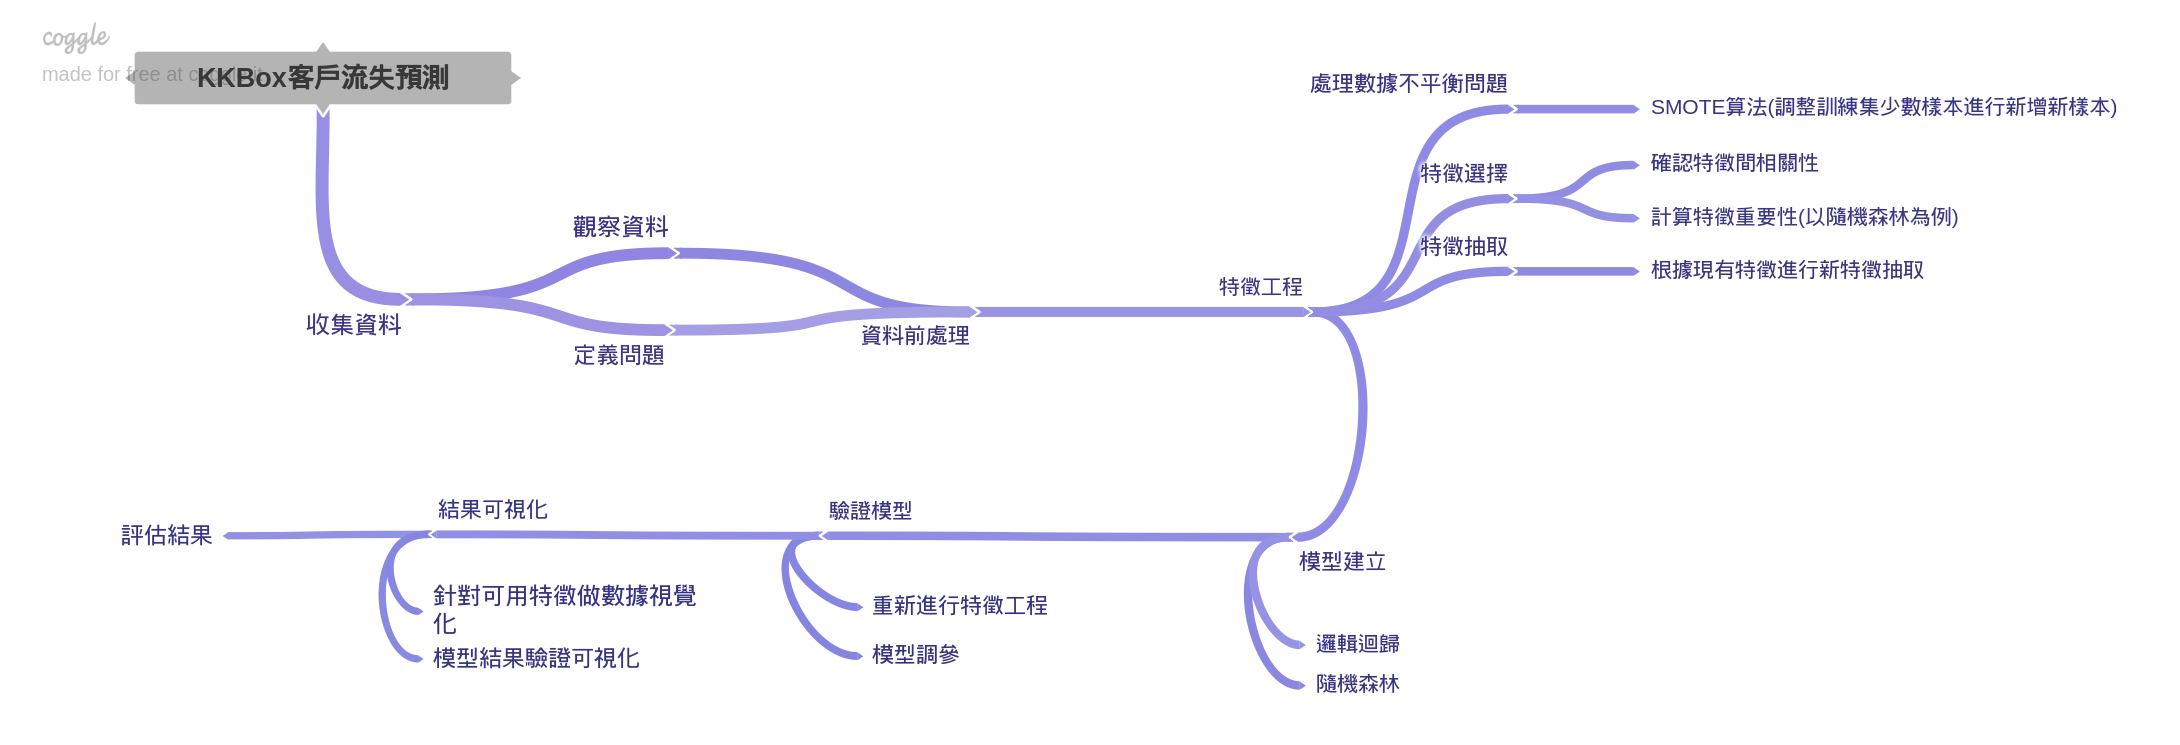

## 觀察資料

* 題目：KKbox用戶流失分析
> * 收集資料：
>> * 目標(流失)資料集：特徵值 -> is_churn(是否流失)
>> * 用戶資料
>> * 交易資料

## 定義問題

##### 目標問題：
* 根據目前的資料，針對流失的會員可能有的特徵與行為，比較**流失用戶存在哪些行為與特徵?**

##### 建立監督式區隔模型
* 建立可理解的監督式區隔，以例如「年齡30~35歲月租自動續約的男性平均顧客流失率5%」做區隔表達。
* 找出不同區隔資料中具有**顯著差異的欄位**

## 數據理解

* 欄位主要以客戶個人資料(所處城市、年齡、性別等)、交易資料(方案價格、方案天數等)、用戶紀錄(聽歌長度比例、聽歌秒數，以每一天為一筆資料)

## 資料前處理

* 處理缺失值 => 因為有欄位缺失值比例過高，不直接將缺失值移除，而是賦予值**歸於同一類**
* 處理各欄位不合理的值(例如年齡為負值等)
* 處理各欄位的型態(例如經過one-hot encoding的資料雖然看起來是數字，但型態要轉成字串等等)
* Python型態問題須考慮記憶體問題，例如float64較float32占較多空間；或是日期型態以datetime型態存在可以處理日期的分隔與取用

## 特徵工程

* 初始觀察資料，有**用戶個人資料**以及**交易資料兩份**。由於兩份資料欄位不同，以用戶個人資料為基礎，加入交易資料欄位製作新特徵。
* 特徵變數(含說明)如下：
> * 個人用戶特徵

|特徵變數|說明|
|--|--|
|is_churn|用戶是否流失(1:是;0:否)|
|city|用戶所在地區|
|bd|年齡。連續型數值|
|gender|性別。離散型數值，缺失值達60%|
|registered_via|用戶註冊途徑。raw data已進行過編碼|
|registration_init_time|註冊時間|

> * 以交易資料製作新特徵

|特徵變數|說明|
|--|--|
|client_level_code|根據不同交易次數分成交易次數區間|
|last_last_churn|根據交易時間取出上次訂閱前是否流失|
|last_auto_renew|根據自動訂閱取出上次與本次交易是否採用自動續約|
|is_discount|根據交易方案與實際付款金額得出是否有折扣，並取出折扣次數|
|amount_per_day|根據實際付款取出平均每天付多少錢|
|longtime_user|根據總購買方案時間是否超過一年取得特徵|
|pay_method_41_ratio|根據付款方式最多的編號41分成用戶是否採用此付款方式|

## 模型建立&預測&評估

##### 關於模型的思考
* 找出可用的模型(分類或迴歸或其他)
* 選擇模型的優勢與劣勢(例如隨機森林能處理特徵很多的資料，且訓練完會給出哪些特徵很重要)
* 模型怎麼設定參數(大部分應該都有部分內建的參數設定；但調參應該不是最優先要做的事，不過在測試過程中確認不同參數或算法影響模型訓練結果程度)
* 訓練結果的驗證效果(驗證模型的分數或其他驗證方法)
* 評估測試結果的方法(例如FPR,TPR等)

## 模型選擇

> ##### Random Forest(隨機森林)
> * 特徵選擇
> * 模型調參
>> * `criterion`: CART數做劃分時對特徵的評價標準，默認為基尼係數'gini'，亦可選擇'entropy'，經測試兩者結果差不多。
>> * `n_estimator`:最大迭代次數(幾棵樹)，目前測試出**最佳n_estimator=10**
>> * `max_depth`:每棵樹最大深度，當樣本數或特徵數多時，建議限制深度。目前測試出**最佳max_depth=30**
>> * `min_samples_split`:內部節點劃分所需最小樣本數。目前測試**最佳min_samples_split=8**
> * 評估模型
>> * `Precision`：正確率(TP/(TP+FP))
>> * `Recall`：召回率(TP/(TP+FN))
>> * `Specificity`：特異度(TN/(FP+TN))
>> * `Confusion Matrix`：混淆矩陣
![CM.png](https://github.com/zhwhong/zhwhong.github.io/blob/blog-source/source/_posts/2017-04-14.ROC-AUC-Precision-Recall-analysis/3.png?raw=true)
>> * `ROC`：反映Recall與Specificity連續變量的綜合指標
>> * `AUC`：ROC特徵曲線下面積
![ROC.png](https://github.com/zhwhong/zhwhong.github.io/blob/blog-source/source/_posts/2017-04-14.ROC-AUC-Precision-Recall-analysis/5.png?raw=true)

## 後續

---

## 問題點

##### 數據不平衡問題
> * 分類問題中，某分類樣本數量遠大於另一分類樣本數量
> * 缺點：可能會產生一個局部優化的分類模型
> * 不平衡數據衡量標準：
>> * 無法使用準確率進行衡量模型
>> * 可以使用混淆矩陣(TP、TN、FP、FN)以及ROC(含AUC)進行衡量模型
> * 處理數據不平衡的幾種常見方法
>> * 降採樣：刪除大類別樣本來取得與小樣本的平衡(缺點：拋棄潛在有用的數據)
>> * 過採樣(單純重複小樣本)：缺點：增加overfitting的風險
>> * 過採樣(SMOTE)：通過在小類別樣本之間插值的方法產生新的小類別樣本，來對訓練集進行過采樣(缺點：可能生成可疑的點)
>> <img style="float: center;" src="http://www.aprilzephyr.com/images/Imbalance/2.png" width="60%">


參考網站：http://www.aprilzephyr.com/blog/07302016/%E6%B7%B1%E5%85%A5%E7%90%86%E8%A7%A3%E4%B8%8D%E5%B9%B3%E8%A1%A1%E6%95%B8%E6%93%9A%E5%88%86%E9%A1%9E%E5%95%8F%E9%A1%8C-%E8%BD%89/
https://www.zhihu.com/question/269698662

---